Original Data:
                              Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        H

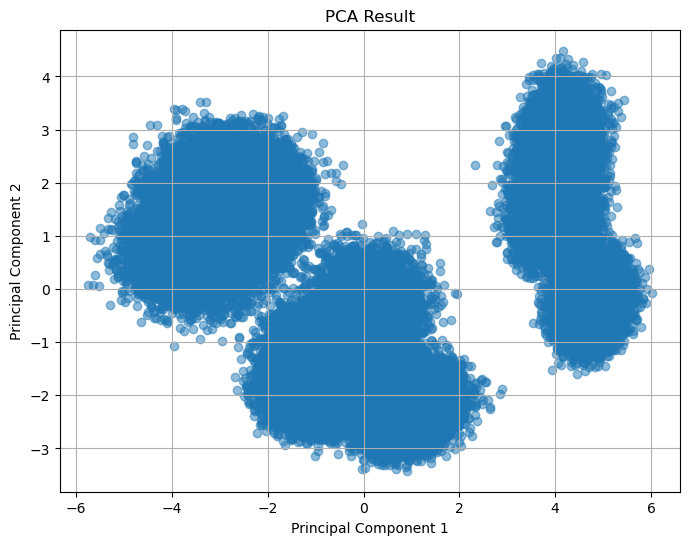

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Function to preprocess data
def preprocess_data(file_path):
    # Read CSV file
    data = pd.read_csv(file_path)
    print("Original Data:\n", data.head())

    # Handle categorical data (text values)
    # Convert categorical variables into dummy/indicator variables
    data = pd.get_dummies(data, drop_first=True)
    print("\nPre-processed Data:\n", data.head())

    return data

# Function to perform PCA
def perform_pca(data):
    # Step 1: Standardization
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    print("\nStandardized Data:\n", scaled_data[:5])

    # Step 2: Covariance Matrix Computation
    covariance_matrix = np.cov(scaled_data, rowvar=False)
    print("\nCovariance Matrix:\n", covariance_matrix)

    # Step 3: Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    print("\nEigenvalues:\n", eigenvalues)
    print("\nEigenvectors:\n", eigenvectors)

    # Step 4: Create a Feature Vector
    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'k' eigenvectors (for example, k=2)
    k = 2
    feature_vector = sorted_eigenvectors[:, :k]
    print("\nFeature Vector:\n", feature_vector)

    # Step 5: Recast the Data Along the Principal Components Axes
    pca_data = scaled_data.dot(feature_vector)
    print("\nRecasted Data:\n", pca_data[:5])

    return pca_data, sorted_eigenvalues[:k]

# Function to visualize PCA results
def visualize_pca(pca_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
    plt.title('PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()

# Main function to run the program
def main(file_path):
    data = preprocess_data(file_path)
    pca_data, eigenvalues = perform_pca(data)
    visualize_pca(pca_data)

# Example usage
if __name__ == "__main__":
    # Replace 'your_file.csv' with the path to your CSV file
    main('../datasets/kaggle_70000.csv')
